In [92]:
import matplotlib.pyplot as plt
#text_kwargs = dict(ha='center', va='center', fontsize=8, color='C1')
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
csfont = {'fontname':'Times New Roman'}
import os

import seaborn as sns

In [93]:
sns.set_theme(style="whitegrid")
#sns.set_context("paper", rc={"font.size":10, "axes.titlesize":7, "axes.labelsize":12})
sns.set(font_scale = 0.8)

In [94]:
def get_data(folder, filename):
    df = pd.read_csv(folder + filename, delimiter=" ")
    return df

In [95]:
def plot_df(df, outputfile, title, xlabel, ylabel):
    labels = []
    data = []
    for i in range(len(df.columns)-1):
        labels.append(df.columns[i+1])
        data.append(df[df.columns[i+1]]*100)
    
    plt.stackplot(df[df.columns[0]], data, alpha=0.7, edgecolor='black')
    ax = plt.gca()
    ax.set_ylim(0,101)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.set_ylim(ymin=-0.01)
    plt.legend(labels)
    plt.savefig(outputfile, bbox_inches = 'tight', pad_inches = 0.1)

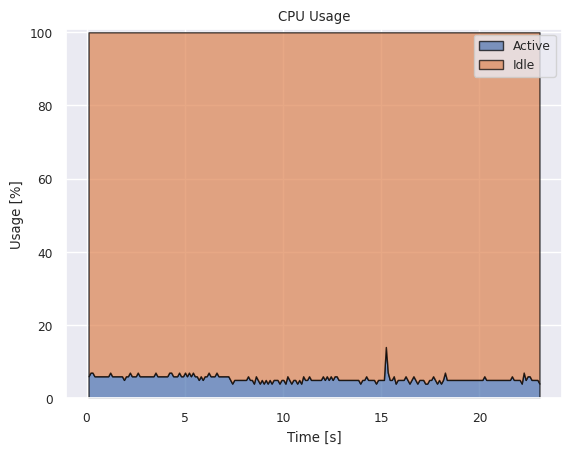

In [96]:
folder = "./"
filename = "cpu-stat.txt"
df = get_data(folder, filename)
plot_df(df, "cpu-usage.pdf", "CPU Usage", "Time [s]", "Usage [%]")

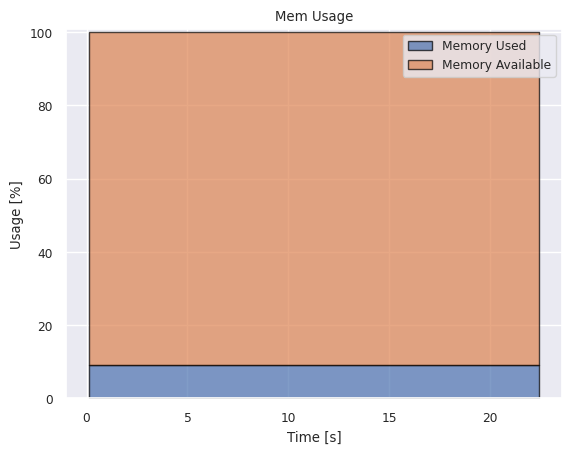

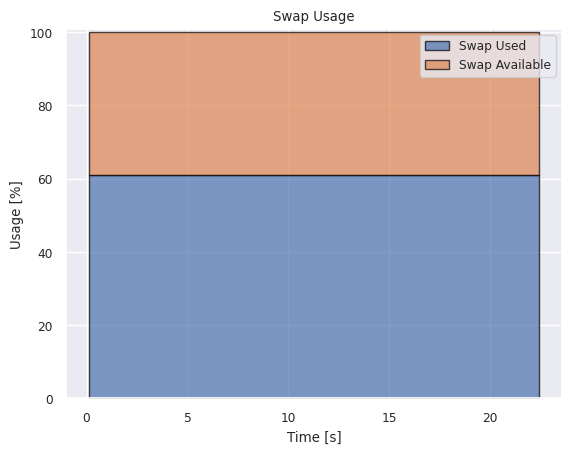

In [97]:
folder = "./"
filename = "mem-stat.txt"
df = get_data(folder, filename)
df_memory = pd.DataFrame({'S': df['S'], 'Memory Used': df['Memory'], 'Memory Available': 1 - df['Memory']})
df_swap = pd.DataFrame({'S': df['S'], 'Swap Used': df['Swap'], 'Swap Available': 1 - df['Swap']}) 
plt.figure(1)
plot_df(df_memory, "mem-usage.pdf", "Mem Usage", "Time [s]", "Usage [%]")
plt.figure(2)
plot_df(df_swap, "swap-usage.pdf", "Swap Usage", "Time [s]", "Usage [%]")

In [98]:
def plot_disk(df, outputfile):
    outputfile_rd = outputfile + "_RD.pdf"
    # plot the data for RD stats
    fig, ax = plt.subplots()
    for col in df.columns:
        if '_RD' in col:
            ax.plot(df['S'], df[col], label=col)

    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Time spent [ms]')
    ax.set_title('Read')
    ax.legend()
    ax.set_ylim(ymin=-0.01)
    plt.savefig(outputfile_rd, bbox_inches = 'tight', pad_inches = 0.1)

    outputfile_wr = outputfile + "_WR.pdf"
    # plot the data for WR stats
    fig, ax = plt.subplots()
    for col in df.columns:
        if '_WR' in col:
            ax.plot(df['S'], df[col], label=col)

    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Time spent [ms]')
    ax.set_title('Write')
    ax.legend()
    ax.set_ylim(ymin=-0.01)
    plt.savefig(outputfile_wr, bbox_inches = 'tight', pad_inches = 0.1)


    outputfile_io = outputfile + "_IO.pdf"
    # plot the data for I/O stats
    fig, ax = plt.subplots()
    for col in df.columns:
        if '_I/O' in col:
            ax.plot(df['S'], df[col], label=col)

    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Time spent [ms]')
    ax.set_title('I/O')
    ax.legend()
    ax.set_ylim(ymin=-0.01)
    plt.savefig(outputfile_io, bbox_inches = 'tight', pad_inches = 0.1)

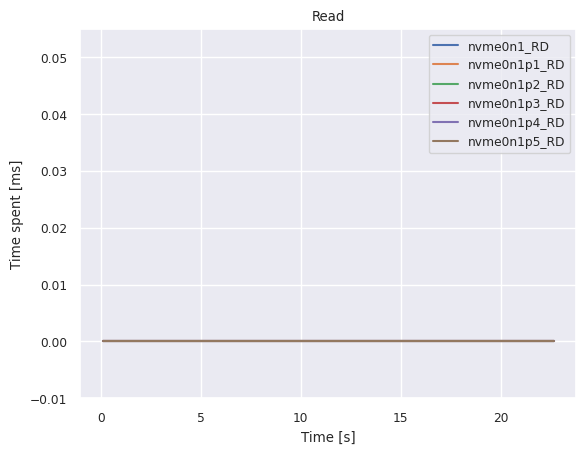

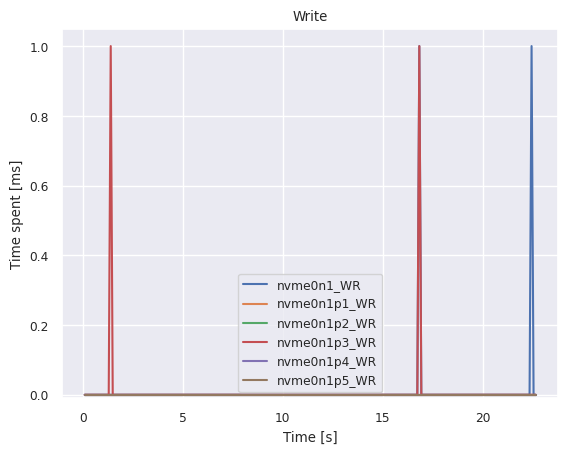

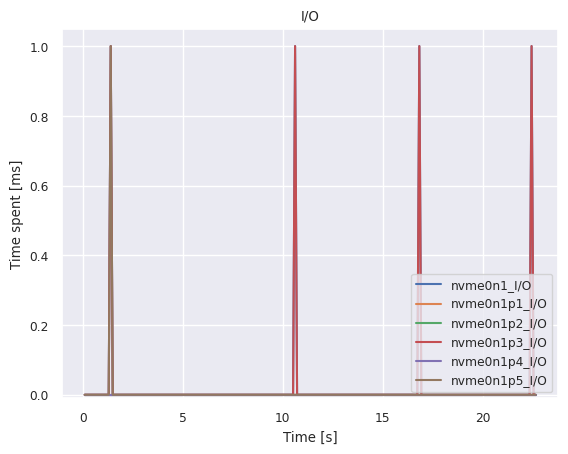

In [99]:
folder = "./"
filename = "disk-stat.txt"
df_disk = get_data(folder, filename)
outputfile = "disk"

plot_disk(df_disk, outputfile)

In [100]:
def plot_net(df, outputfile):
    outputfile_rd = outputfile + "_TX.pdf"
    # plot the data for RD stats
    fig, ax = plt.subplots()
    for col in df.columns:
        if '_TX' in col:
            ax.plot(df['S'], df[col], label=col)

    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Bytes')
    ax.set_title('Transmitted')
    ax.legend()
    ax.set_ylim(ymin=-0.01)
    plt.savefig(outputfile_rd, bbox_inches = 'tight', pad_inches = 0.1)

    outputfile_wr = outputfile + "_RX.pdf"
    # plot the data for WR stats
    fig, ax = plt.subplots()
    for col in df.columns:
        if '_RX' in col:
            ax.plot(df['S'], df[col], label=col)

    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Bytes')
    ax.set_title('Received')
    ax.legend()
    ax.set_ylim(ymin=-0.01)
    plt.savefig(outputfile_wr, bbox_inches = 'tight', pad_inches = 0.1)

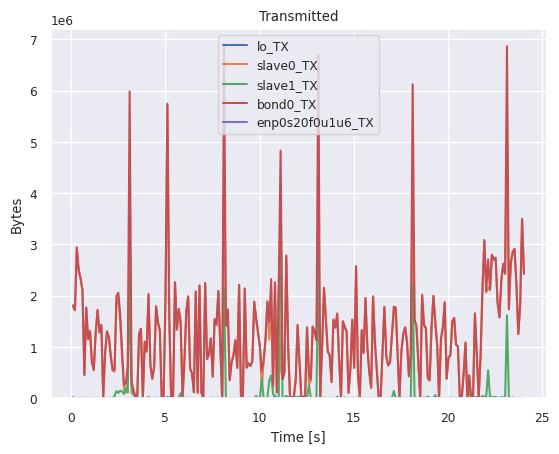

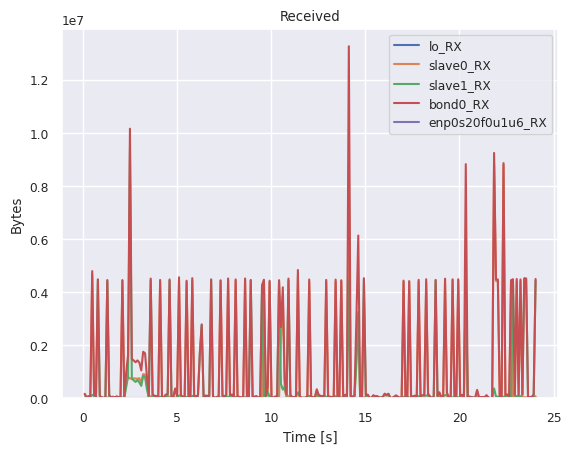

In [101]:
folder = "./"
filename = "net-stat.txt"
df_net = get_data(folder, filename)
outputfile = "net"

df_net.head

plot_net(df_net, outputfile)